In [1]:
#ループ強化学習した結果強かったパーティの表示
# 各iterationから代表100パーティずつが対戦

In [2]:
from pokeai.ai.party_db import col_party, col_rate, pack_obj, unpack_obj
from bson import ObjectId
import numpy as np
import matplotlib.pyplot as plt
from pokeai.util import json_load, pickle_load, ROOT_DIR, DATASET_DIR

In [3]:
file_base_dir = r"D:\dev\pokeai\pokeai\experiment\gmm\rl\rl_loop_200815"

In [4]:
iter_ids = json_load(file_base_dir+"/iter_ids.json")

In [5]:
rates = col_rate.find_one({"_id": ObjectId("5f48dfb7a97c3f95899b0142")})["rates"]

In [6]:
def load_parties(player_ids):
    party_ids = {player_id.split('+')[1] for player_id in player_ids}
    return {party_id:col_party.find_one({"_id":ObjectId(party_id)})["party"] for party_id in party_ids}

In [7]:
parties = load_parties(rates.keys())

In [8]:
name2jp = json_load(DATASET_DIR.joinpath("name2jp.json"))["name2jp"]
def print_party(p):
    for poke in p:
        return (",".join([name2jp[poke["species"]],"LV"+str(poke["level"]), *[name2jp[move] for move in poke["moves"]]]))

In [9]:
def get_mean_by_prefix(rates, prefix):
    f_rates = []
    for player_id, rate in rates.items():
        if player_id.startswith(prefix):
            f_rates.append(rate)
    return np.mean(f_rates)

In [10]:
xs = []
mean_rates = []
for iter_id in iter_ids:
    xs.append(iter_id["iternum"])
    mean_rates.append(get_mean_by_prefix(rates, iter_id["trainer_id"]))
mean_rates

[1316.4204632577855,
 1417.8784050101976,
 1527.7768410064193,
 1543.2546979521808,
 1540.3242702798082,
 1541.2547197024885,
 1508.8883632723487,
 1535.7652329903178,
 1517.9501709402618,
 1550.4868355881918]

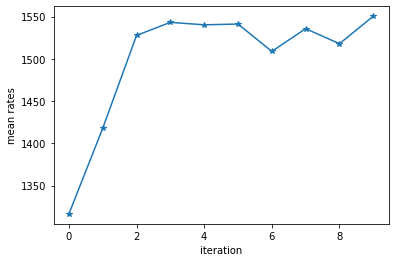

In [11]:
plt.plot(xs, mean_rates, marker="*")
plt.xlabel("iteration")
plt.ylabel("mean rates")
plt.show()

In [12]:
rate_tuples = [(rate, player_id) for player_id, rate in rates.items()]
rate_tuples.sort()

In [13]:
rate_tuples

[(1054.1965948413267, '5f37a6829949403bf6af940b+5f37a6dedad3374a0e124792'),
 (1080.431658852777, '5f37a6829949403bf6af940b+5f37a6e0fb6c8752f01d2dc0'),
 (1114.6982550764092, '5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124980'),
 (1115.6490063706929, '5f37a6829949403bf6af940b+5f37a6dfdad3374a0e1248e8'),
 (1119.5876558983368, '5f37a6829949403bf6af940b+5f37a6dedad3374a0e1247db'),
 (1125.436279543656, '5f37a6829949403bf6af940b+5f37a6dedad3374a0e124735'),
 (1129.4353118908643, '5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124a5b'),
 (1132.6673816932393, '5f37a6829949403bf6af940b+5f37a6dfdad3374a0e12488c'),
 (1143.6762891315439, '5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124954'),
 (1148.7918871312959, '5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124902'),
 (1158.3534690783486, '5f37a6829949403bf6af940b+5f37a6dedad3374a0e1247b9'),
 (1165.4609115670194, '5f37a6829949403bf6af940c+5f37d87e4e3f9365cecacb3f'),
 (1166.1192856722714, '5f37a6829949403bf6af940b+5f37a6dedad3374a0e12472a'),
 (1168.4351869

In [25]:
for rate, player_id in rate_tuples[:-51:-1]:
    print(rate, player_id)
    print(print_party(parties[player_id.split("+")[1]]))

1795.4625446165473 5f37a6829949403bf6af9412+5f38dbeb63569b3772554eba
ドンファン,LV55,じしん,げんしのちから,ころがる,つのでつく
1776.5550185941684 5f37a6829949403bf6af9411+5f38b1286ec74d7bb2d8eb3e
バンギラス,LV55,じしん,かいりき,げんしのちから,ばくれつパンチ
1775.8940315426146 5f37a6829949403bf6af9413+5f3903f5dcc450c616728993
ドンファン,LV55,つのでつく,じしん,いわくだき,げんしのちから
1764.9098894453875 5f37a6829949403bf6af9412+5f38dbeb63569b3772554e02
ドンファン,LV55,ころがる,げんしのちから,じしん,つのでつく
1747.259815658778 5f37a6829949403bf6af9412+5f38dbeb63569b377255507c
ドンファン,LV55,じしん,ころがる,つのでつく,げんしのちから
1744.420279654895 5f37a6829949403bf6af9410+5f3888187955353d68b9e44e
カビゴン,LV55,れいとうパンチ,すなあらし,のしかかり,ばくれつパンチ
1742.3786110079147 5f37a6829949403bf6af9410+5f3888187955353d68b9e56d
ドンファン,LV55,じしん,ころがる,かいりき,げんしのちから
1732.3033016199465 5f37a6829949403bf6af940e+5f3835dad10c9203103a67bd
カビゴン,LV55,どろかけ,おんがえし,バブルこうせん,ばくれつパンチ
1729.3762392404512 5f37a6829949403bf6af9412+5f38dbeb63569b3772555042
ニドクイン,LV55,じしん,つのドリル,はかいこうせん,だいもんじ
1722.6149233470458 5f37a6829949403bf6af9410+5f3888187955353d68b9e

In [24]:
for rate, player_id in rate_tuples[:10]:
    print(rate, player_id)
    print(print_party(parties[player_id.split("+")[1]]))

1054.1965948413267 5f37a6829949403bf6af940b+5f37a6dedad3374a0e124792
ニョロトノ,LV55,はかいこうせん,なみのり,サイコキネシス,いわくだき
1080.431658852777 5f37a6829949403bf6af940b+5f37a6e0fb6c8752f01d2dc0
カメックス,LV55,ばくれつパンチ,ハイドロポンプ,でんじほう,たきのぼり
1114.6982550764092 5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124980
スターミー,LV55,おんがえし,たきのぼり,かみなり,すてみタックル
1115.6490063706929 5f37a6829949403bf6af940b+5f37a6dfdad3374a0e1248e8
ポリゴン２,LV55,かみなり,でんじほう,１０まんボルト,ふぶき
1119.5876558983368 5f37a6829949403bf6af940b+5f37a6dedad3374a0e1247db
スイクン,LV55,バブルこうせん,いわくだき,たきのぼり,おんがえし
1125.436279543656 5f37a6829949403bf6af940b+5f37a6dedad3374a0e124735
ゴルダック,LV55,ハイドロポンプ,スピードスター,はなびらのまい,れいとうパンチ
1129.4353118908643 5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124a5b
ヤドキング,LV55,サイコキネシス,じしん,とっしん,のしかかり
1132.6673816932393 5f37a6829949403bf6af940b+5f37a6dfdad3374a0e12488c
オーダイル,LV55,おんがえし,かいりき,ハイドロポンプ,げんしのちから
1143.6762891315439 5f37a6829949403bf6af940b+5f37a6dfdad3374a0e124954
カイリュー,LV55,かみなり,れいとうパンチ,どろかけ,どくどく
1148.7918871312959 5f37a6829949403bf6af940b+5f37a

In [16]:
print("|レート|パーティ|")
print("|---|---|")
for rate, player_id in rate_tuples[:-11:-1]:
    print(f"|{int(rate)}|{print_party(parties[player_id.split('+')[1]])}|")

|レート|パーティ|
|---|---|
|1795|ドンファン,LV55,じしん,げんしのちから,ころがる,つのでつく|
|1776|バンギラス,LV55,じしん,かいりき,げんしのちから,ばくれつパンチ|
|1775|ドンファン,LV55,つのでつく,じしん,いわくだき,げんしのちから|
|1764|ドンファン,LV55,ころがる,げんしのちから,じしん,つのでつく|
|1747|ドンファン,LV55,じしん,ころがる,つのでつく,げんしのちから|
|1744|カビゴン,LV55,れいとうパンチ,すなあらし,のしかかり,ばくれつパンチ|
|1742|ドンファン,LV55,じしん,ころがる,かいりき,げんしのちから|
|1732|カビゴン,LV55,どろかけ,おんがえし,バブルこうせん,ばくれつパンチ|
|1729|ニドクイン,LV55,じしん,つのドリル,はかいこうせん,だいもんじ|
|1722|カビゴン,LV55,じしん,のしかかり,かみなり,ソーラービーム|


In [17]:
print("|レート|パーティ|")
print("|---|---|")
for rate, player_id in rate_tuples[:10]:
    print(f"|{int(rate)}|{print_party(parties[player_id.split('+')[1]])}|")

|レート|パーティ|
|---|---|
|1054|ニョロトノ,LV55,はかいこうせん,なみのり,サイコキネシス,いわくだき|
|1080|カメックス,LV55,ばくれつパンチ,ハイドロポンプ,でんじほう,たきのぼり|
|1114|スターミー,LV55,おんがえし,たきのぼり,かみなり,すてみタックル|
|1115|ポリゴン２,LV55,かみなり,でんじほう,１０まんボルト,ふぶき|
|1119|スイクン,LV55,バブルこうせん,いわくだき,たきのぼり,おんがえし|
|1125|ゴルダック,LV55,ハイドロポンプ,スピードスター,はなびらのまい,れいとうパンチ|
|1129|ヤドキング,LV55,サイコキネシス,じしん,とっしん,のしかかり|
|1132|オーダイル,LV55,おんがえし,かいりき,ハイドロポンプ,げんしのちから|
|1143|カイリュー,LV55,かみなり,れいとうパンチ,どろかけ,どくどく|
|1148|エレブー,LV55,いわくだき,でんじほう,どくどく,すてみタックル|


In [18]:
pokes = []
for rate, player_id in rate_tuples:
    pokes.append((parties[player_id.split("+")[1]])[0]["species"])

In [19]:
moves = []
for rate, player_id in rate_tuples:
    moves.extend((parties[player_id.split("+")[1]])[0]["moves"])

In [20]:
from collections import Counter

In [21]:
def display_hindo(items):
    c = Counter(items)
    print("|要素|出現回数|")
    print("|---|---|")
    for k, v in c.most_common():
        print(f"|{name2jp[k]}|{v}|")

In [22]:
display_hindo(pokes)

|要素|出現回数|
|---|---|
|カビゴン|468|
|ケンタロス|92|
|ライコウ|75|
|サンダー|69|
|ラプラス|61|
|バンギラス|51|
|ガルーラ|28|
|カイリュー|19|
|リングマ|16|
|エーフィ|12|
|ミルタンク|8|
|ニドクイン|7|
|ドンファン|7|
|スターミー|6|
|スイクン|6|
|サンダース|6|
|ポリゴン２|5|
|キングドラ|5|
|フーディン|5|
|レアコイル|5|
|ジュゴン|5|
|ランターン|4|
|ゴルダック|3|
|ゲンガー|3|
|フリーザー|3|
|イノムー|3|
|オーダイル|2|
|エレブー|2|
|ウインディ|2|
|エンテイ|2|
|ハピナス|2|
|ムウマ|2|
|デンリュウ|2|
|ニョロトノ|1|
|カメックス|1|
|ヤドキング|1|
|オオタチ|1|
|ギャラドス|1|
|ナッシー|1|
|マルマイン|1|
|ギャロップ|1|
|ライチュウ|1|
|バクフーン|1|
|ベトベトン|1|
|シャワーズ|1|
|ファイヤー|1|
|ピクシー|1|


In [23]:
display_hindo(moves)

|要素|出現回数|
|---|---|
|おんがえし|258|
|のしかかり|244|
|１０まんボルト|174|
|じしん|160|
|つのドリル|158|
|すてみタックル|154|
|ソーラービーム|147|
|かえんほうしゃ|128|
|どろかけ|120|
|いわくだき|115|
|だいもんじ|108|
|なみのり|107|
|すなあらし|102|
|でんじほう|98|
|ほのおのパンチ|98|
|ころがる|97|
|かげぶんしん|94|
|ばくれつパンチ|92|
|かいりき|91|
|ロケットずつき|90|
|かみなり|86|
|れいとうビーム|85|
|バブルこうせん|84|
|とっしん|80|
|ふぶき|78|
|ずつき|75|
|はかいこうせん|74|
|れいとうパンチ|73|
|ちきゅうなげ|71|
|どくどく|70|
|かみなりパンチ|70|
|サイコキネシス|63|
|いあいぎり|61|
|げんしのちから|55|
|つのでつく|54|
|ドリルくちばし|50|
|スピードスター|39|
|ハイドロポンプ|38|
|ふみつけ|32|
|そらをとぶ|32|
|ゴッドバード|27|
|はがねのつばさ|21|
|たきのぼり|16|
|サイケこうせん|15|
|つばさでうつ|10|
|ギガドレイン|3|
|はなびらのまい|1|
|ヘドロばくだん|1|
|ナイトヘッド|1|
